### Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [9]:
data = pd.read_csv('Accidentes 2010-18 TFM.csv', sep = ',')
data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,1/1/10,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,NO,NO,NO,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS
1,1/1/10,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,NO,NO,NO,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS
2,1/1/10,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,NO,NO,NO,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS
3,1/1/10,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,NO,NO,NO,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS
4,1/1/10,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,NO,NO,NO,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS


In [10]:
data.shape

(252998, 26)

In [11]:
data = pd.DataFrame(data)

In [12]:
print(data.isnull().sum())

FECHA                 0
RANGO HORARIO         0
DIA SEMANA            0
DISTRITO              0
LUGAR ACCIDENTE       0
Nº                    0
Nº PARTE              0
CPFA Granizo          0
CPFA Hielo            0
CPFA Lluvia           0
CPFA Niebla           0
CPFA Seco             0
CPFA Nieve            0
CPSV Mojada           0
CPSV Aceite           0
CPSV Barro            0
CPSV Grava Suelta     0
CPSV Hielo            0
CPSV Seca Y Limpia    0
* Nº VICTIMAS         0
TIPO ACCIDENTE        0
Tipo Vehiculo         0
TIPO PERSONA          0
SEXO                  0
LESIVIDAD             0
Tramo Edad            0
dtype: int64


In [13]:
data.dtypes

FECHA                 object
RANGO HORARIO         object
DIA SEMANA            object
DISTRITO              object
LUGAR ACCIDENTE       object
Nº                    object
Nº PARTE              object
CPFA Granizo          object
CPFA Hielo            object
CPFA Lluvia           object
CPFA Niebla           object
CPFA Seco             object
CPFA Nieve            object
CPSV Mojada           object
CPSV Aceite           object
CPSV Barro            object
CPSV Grava Suelta     object
CPSV Hielo            object
CPSV Seca Y Limpia    object
* Nº VICTIMAS          int64
TIPO ACCIDENTE        object
Tipo Vehiculo         object
TIPO PERSONA          object
SEXO                  object
LESIVIDAD             object
Tramo Edad            object
dtype: object

### Primeras ideas con las columnas

- Con la fecha se pueden hacer muchas cosas - extraer época del año (estación o mes), día del mes etc (para recategorizar).

- El rango horario es texto ahora mismo. Se puede transformar en 24 categorías simplemente con el número para que sea numérica.

- Lugar del accidente es la calle. Se puede agrupar por barrios o por tipo de vía a lo mejor (calle, avenida, autovía, interior de ciudad, exterior...)

- Con los heridos hay que mirar: algunos pone 7 víctimas y solo información del conductor, otros es el mismo accidente pero con datos del resto (pasajeros etc) y mantiene solo víctima 1. Se tratan de forma diferente los accidentes.

- Condiciones de la carretera: probar si mantener las 5 variables en dummy o convertir en categorías - pero se pueden dar varias condiciones a la vez...

- Tipo de vehículo, tipo de accidente, tipo de persona, sexo y tramo de edad probar opciones de numérico, dummy etc. a ver qué funciona mejor.

- La variable objetivo va a ser la lesividad del accidente y el ejercicio va a consistir en crear un modelo de clasificación de lesividad del accidente para prevenir y mejorar la distribución de recursos en la ciudad de Madrid.



### EDA

#### Columna de fecha
Lo primero que vamos a hacer es dividir el campo fecha en tres columnas: día del mes, mes y año

In [14]:
data["FECHA"] = data["FECHA"].astype('datetime64')

In [15]:
import datetime as dt
data['AÑO'] = pd.DatetimeIndex(data['FECHA']).year
data['MES'] = pd.DatetimeIndex(data['FECHA']).month
data['DIA'] = pd.DatetimeIndex(data['FECHA']).day

In [16]:
data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,AÑO,MES,DIA
0,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,2010,1,1
1,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS,2010,1,1
2,2010-01-01,DE 00:00 A 00:59,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,1,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS,2010,1,1
3,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS,2010,1,1
4,2010-01-01,DE 1:00 A 1:59,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS,2010,1,1


In [17]:
data['AÑO'].value_counts()

2018    30122
2017    29795
2016    29201
2015    28172
2014    27967
2011    27342
2012    26982
2013    26839
2010    26578
Name: AÑO, dtype: int64

In [18]:
data['MES'].value_counts()

10    24491
11    23418
6     23212
12    22880
5     22495
9     21282
3     21025
7     20405
2     20194
4     20023
1     19703
8     13870
Name: MES, dtype: int64

In [19]:
data['DIA'].value_counts()

19    8810
4     8718
21    8687
20    8656
18    8605
11    8586
23    8552
14    8520
13    8517
5     8451
6     8357
16    8354
3     8306
24    8257
10    8236
17    8232
12    8222
9     8197
28    8193
22    8172
26    8120
27    8120
1     8091
7     8061
8     8004
25    7990
29    7882
2     7877
15    7871
30    7862
31    4492
Name: DIA, dtype: int64

#### Columna de hora del accidente
El objetivo con esta columna es reconvertirla a numérica. Primero vamos a probar con LabelEnconder y si no rinde bien, probaremos con OneHotEncoder

In [20]:
data["RANGO HORARIO"].value_counts()

DE 14:00 A 14:59    18232
DE 19:00 A 19:59    18049
DE 20:00 A 20:59    17244
DE 18:00 A 18:59    16259
DE 13:00 A 13:59    15921
DE 15:00 A 15:59    14557
DE 12:00 A 12:59    14473
DE 9:00 A 9:59      14348
DE 17:00 A 17:59    14137
DE 21:00 A 21:59    14113
DE 16:00 A 16:59    13590
DE 11:00 A 11:59    12492
DE 8:00 A 8:59      11759
DE 10:00 A 10:59    11561
DE 22:00 A 22:59    10758
DE 23:00 A 23:59     7191
DE 7:00 A 7:59       6428
DE 00:00 A 00:59     4729
DE 6:00 A 6:59       3992
DE 1:00 A 1:59       3602
DE 2:00 A 2:59       2776
DE 3:00 A 3:59       2431
DE 5:00 A 5:59       2225
DE 4:00 A 4:59       2131
Name: RANGO HORARIO, dtype: int64

In [21]:
data.loc[data['RANGO HORARIO'] == 'DE 00:00 A 00:59','RANGO HORARIO'] = 'Madrugada'
data.loc[data['RANGO HORARIO'] == 'DE 1:00 A 1:59','RANGO HORARIO'] = 'Madrugada'
data.loc[data['RANGO HORARIO'] == 'DE 2:00 A 2:59','RANGO HORARIO'] = 'Madrugada'
data.loc[data['RANGO HORARIO'] == 'DE 3:00 A 3:59','RANGO HORARIO'] = 'Madrugada'
data.loc[data['RANGO HORARIO'] == 'DE 4:00 A 4:59','RANGO HORARIO'] = 'Madrugada'
data.loc[data['RANGO HORARIO'] == 'DE 5:00 A 5:59','RANGO HORARIO'] = 'Madrugada'
data.loc[data['RANGO HORARIO'] == 'DE 6:00 A 6:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 7:00 A 7:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 8:00 A 8:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 9:00 A 9:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 10:00 A 10:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 11:00 A 11:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 12:00 A 12:59','RANGO HORARIO'] = 'Mañana'
data.loc[data['RANGO HORARIO'] == 'DE 13:00 A 13:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 14:00 A 14:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 15:00 A 15:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 16:00 A 16:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 17:00 A 17:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 18:00 A 18:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 19:00 A 19:59','RANGO HORARIO'] = 'Tarde'
data.loc[data['RANGO HORARIO'] == 'DE 20:00 A 20:59','RANGO HORARIO'] = 'Noche'
data.loc[data['RANGO HORARIO'] == 'DE 21:00 A 21:59','RANGO HORARIO'] = 'Noche'
data.loc[data['RANGO HORARIO'] == 'DE 22:00 A 22:59','RANGO HORARIO'] = 'Noche'
data.loc[data['RANGO HORARIO'] == 'DE 23:00 A 23:59','RANGO HORARIO'] = 'Noche'

In [22]:
data['RANGO HORARIO'].value_counts()

Tarde        110745
Mañana        75053
Noche         49306
Madrugada     17894
Name: RANGO HORARIO, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
data_prep = LabelEncoder()
data_prep.fit_transform(data["RANGO HORARIO"])

array([0, 0, 0, ..., 2, 2, 2])

In [25]:
data['HORA'] = data_prep.transform(data['RANGO HORARIO'])

In [26]:
data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,AÑO,MES,DIA,HORA
0,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,2010,1,1,0
1,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS,2010,1,1,0
2,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS,2010,1,1,0
3,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS,2010,1,1,0
4,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,MUJER,HL,DE 30 A 34 ANOS,2010,1,1,0


#### Columna con el lugar del accidente

Algo que podría ser interesante de cara a clasificar la lesividad del accidente es ver si en ciertos tipos de calle la gravedad del accidente es mayor o menor. Para ello, voy a extraer del lugar la primera palabra que casi siempre será "Autovía", "Calle", "Avenida" y crear un campo numérico con LabelEncoder (a futuro, veremos si funciona mejor con OneHotEncoder).

In [27]:
data['TIPO VIA']=data['LUGAR ACCIDENTE'].str.split().str.get(0)

In [28]:
data['TIPO VIA'].value_counts()

CALLE           141919
AVENIDA          51296
PASEO            20372
AUTOVIA          17982
PLAZA             7486
GLORIETA          3906
CARRETERA         2902
CAMINO            1296
RONDA             1167
CUESTA             954
COMPLEJO           449
ACCESO             420
PARQUE             411
GRAN               353
BULEVAR            303
MERCADO            275
ESTACION           213
CAÑADA             166
AEROPUERTO         160
PUENTE             159
CARRERA            155
SUBTERRANEO        120
CARRIL              75
TRAVESIA            72
PARKING             53
LUGAR               52
ARROYO              41
JARDIN              41
POBLADO             32
COSTANILLA          30
COLONIA             25
PUERTA              25
PASAJE              24
BARRIO              17
POLIGONO            16
URBANIZACION        13
RIO                  7
CALLEJON             5
PARTICULAR           4
EDIFICIO             2
Name: TIPO VIA, dtype: int64

In [29]:
for key, value in data["TIPO VIA"].value_counts().items():
    if value < 121:
        data["TIPO VIA"].replace({key: "OTROS"}, inplace=True) 
    

In [30]:
data['TIPO VIA'].value_counts()

CALLE         141919
AVENIDA        51296
PASEO          20372
AUTOVIA        17982
PLAZA           7486
GLORIETA        3906
CARRETERA       2902
CAMINO          1296
RONDA           1167
CUESTA           954
OTROS            654
COMPLEJO         449
ACCESO           420
PARQUE           411
GRAN             353
BULEVAR          303
MERCADO          275
ESTACION         213
CAÑADA           166
AEROPUERTO       160
PUENTE           159
CARRERA          155
Name: TIPO VIA, dtype: int64

In [31]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['TIPO VIA'])
data['CATEGORIA VIA'] = data_prep.transform(data['TIPO VIA'])

In [32]:
data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,AÑO,MES,DIA,HORA,TIPO VIA,CATEGORIA VIA
0,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,CONDUCTOR,HOMBRE,IL,DE 18 A 20 AÑOS,2010,1,1,0,CALLE,5
1,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,CONDUCTOR,HOMBRE,IL,DE 50 A 54 AÑOS,2010,1,1,0,CALLE,5
2,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM ...,104,2010/135,NO,NO,SI,...,VIAJERO,MUJER,HL,DE 40 A 44 AÑOS,2010,1,1,0,CALLE,5
3,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,VIAJERO,MUJER,HL,DE 25 A 29 AÑOS,2010,1,1,0,AUTOVIA,2
4,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM. ...,10200,2010/94,NO,NO,NO,...,VIAJERO,MUJER,HL,DE 30 A 34 ANOS,2010,1,1,0,AUTOVIA,2


#### Columnas condiciones en la carretera

Con estas columnas, simplemente vamos a mapear los valores para que los "si" sean 1 y los "no" sean 0.

In [33]:
data['CPFA Granizo'] = data['CPFA Granizo'].map({'SI':1,'NO':0})

In [34]:
data['CPFA Hielo'] = data['CPFA Hielo'].map({'SI':1,'NO':0})

In [35]:
data['CPFA Lluvia'] = data['CPFA Lluvia'].map({'SI':1,'NO':0})

In [36]:
data['CPFA Niebla'] = data['CPFA Niebla'].map({'SI':1,'NO':0})

In [37]:
data['CPFA Seco'] = data['CPFA Seco'].map({'SI':1,'NO':0})

In [38]:
data['CPFA Nieve'] = data['CPFA Nieve'].map({'SI':1,'NO':0})

In [39]:
data['CPSV Mojada'] = data['CPSV Mojada'].map({'SI':1,'NO':0})

In [40]:
data['CPSV Aceite'] = data['CPSV Aceite'].map({'SI':1,'NO':0})

In [41]:
data['CPSV Barro'] = data['CPSV Barro'].map({'SI':1,'NO':0})

In [42]:
data['CPSV Grava Suelta'] = data['CPSV Grava Suelta'].map({'SI':1,'NO':0})

In [43]:
data['CPSV Hielo'] = data['CPSV Hielo'].map({'SI':1,'NO':0})

In [44]:
data['CPSV Seca Y Limpia'] = data['CPSV Seca Y Limpia'].map({'SI':1,'NO':0})

In [45]:
data.drop(['CPSV Mojada', 'CPSV Hielo', 'CPSV Seca Y Limpia',], axis='columns', inplace=True)

#### Columnas tipo accidente, tipo vehículo, sexo, tipo persona y tramo de edad

En este caso, vamos a convertir todas estas variables en numéricas utilizando LabelEncoder. Del mismo modo que con el resto de variables categóricas, en caso de no mostrar buenos resultados probaremos a reconvertirlas usando OneHotEncoder.

##### Tipo de Accidente

In [46]:
data['TIPO ACCIDENTE'].value_counts()

COLISIÓN DOBLE                              145544
ATROPELLO                                    41398
COLISIÓN MÚLTIPLE                            29195
CAÍDA MOTOCICLETA                            14155
CHOQUE CON OBJETO FIJO                       12595
CAÍDA VIAJERO BUS                             2794
CAÍDA BICICLETA                               2616
CAÍDA CICLOMOTOR                              2536
VUELCO                                        1135
OTRAS CAUSAS                                  1011
CAÍDA VEHÍCULO 3 RUEDAS                         19
Name: TIPO ACCIDENTE, dtype: int64

Cosas que pueden ser interesantes viendo el tipo de valores:
- Lo primero es unir caída motocicleta con caída ciclomotor ya que la única diferencia son las cilindradas y así podemos reducir un poco la dimensionalidad.
- Igual si no rinde bien la variable con el modelo, podemos unir colisión múltiple con colisión doble en una sola: colisión múltiple, aunque a priori puede ser interesante verlas por separado ya que tiene un impacto en la gravedad del accidente.

In [47]:
#Intento hcer el replace para arreglar lo de ciclomotor y motocicleta y veo que no hace nada.
data["TIPO ACCIDENTE"].replace({"CAÍDA CICLOMOTOR": "CAÍDA MOTOCICLETA"}, inplace=True)

In [48]:
data["TIPO ACCIDENTE"].value_counts()

COLISIÓN DOBLE                              145544
ATROPELLO                                    41398
COLISIÓN MÚLTIPLE                            29195
CAÍDA MOTOCICLETA                            14155
CHOQUE CON OBJETO FIJO                       12595
CAÍDA VIAJERO BUS                             2794
CAÍDA BICICLETA                               2616
CAÍDA CICLOMOTOR                              2536
VUELCO                                        1135
OTRAS CAUSAS                                  1011
CAÍDA VEHÍCULO 3 RUEDAS                         19
Name: TIPO ACCIDENTE, dtype: int64

In [49]:
#Con esto compruebo si el contenido de la tercera fila en esta columna realmente es colisión múltiple o hay más caracteres
"COLISIÓN MÚLTIPLE" == data['TIPO ACCIDENTE'][3]

False

In [50]:
#Sale False. Para arreglarlo:
##Meter en un df las columnas que sean objetos
df_obj = data.select_dtypes(['object'])
print(df_obj)

       RANGO HORARIO DIA SEMANA                        DISTRITO  \
0          Madrugada    VIERNES  CHAMARTIN                        
1          Madrugada    VIERNES  CHAMARTIN                        
2          Madrugada    VIERNES  CHAMARTIN                        
3          Madrugada    VIERNES  PUENTE DE VALLECAS               
4          Madrugada    VIERNES  PUENTE DE VALLECAS               
...              ...        ...                             ...   
252993         Noche      LUNES  SALAMANCA                        
252994         Noche      LUNES  SALAMANCA                        
252995         Noche      LUNES  HORTALEZA                        
252996         Noche      LUNES  HORTALEZA                        
252997         Noche      LUNES  HORTALEZA                        

                                          LUGAR ACCIDENTE     Nº  Nº PARTE  \
0       CALLE DE CARTAGENA NUM                        ...    104  2010/135   
1       CALLE DE CARTAGENA NUM         

In [51]:
#Aplicar la función strip a todas las columnas por si acaso pasan en las demás.
data[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [52]:
#Ahora esto ya no pasa
"COLISIÓN MÚLTIPLE" == data['TIPO ACCIDENTE'][3]

True

In [53]:
data["TIPO ACCIDENTE"].replace({"CAÍDA CICLOMOTOR": "CAÍDA MOTOCICLETA"}, inplace=True)

In [54]:
#Puedo cambiar ya los valores
data["TIPO ACCIDENTE"].value_counts()

COLISIÓN DOBLE             145544
ATROPELLO                   41398
COLISIÓN MÚLTIPLE           29195
CAÍDA MOTOCICLETA           16691
CHOQUE CON OBJETO FIJO      12595
CAÍDA VIAJERO BUS            2794
CAÍDA BICICLETA              2616
VUELCO                       1135
OTRAS CAUSAS                 1011
CAÍDA VEHÍCULO 3 RUEDAS        19
Name: TIPO ACCIDENTE, dtype: int64

In [55]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['TIPO ACCIDENTE'])
data['T.ACCIDENTE'] = data_prep.transform(data['TIPO ACCIDENTE'])

In [56]:
data['T.ACCIDENTE'].value_counts()

6    145544
0     41398
7     29195
2     16691
5     12595
4      2794
1      2616
9      1135
8      1011
3        19
Name: T.ACCIDENTE, dtype: int64

##### Tipo de vehículo

In [57]:
data['Tipo Vehiculo'].value_counts()

TURISMO            131483
NO ASIGNADO         46852
MOTOCICLETA         32742
FURGONETA            9873
AUTO-TAXI            8311
AUTOBUS-AUTOCAR      7017
CICLOMOTOR           6045
BICICLETA            5524
CAMION               2499
VARIOS               2117
AMBULANCIA            492
VEH.3 RUEDAS           43
Name: Tipo Vehiculo, dtype: int64

Aunque a priori parezca que la categoría NO ASIGNADO sean valores faltantes, por el número de value_counts parece que se trata de información sobre atropellos o caídas de pasajeros en las que no sería necesario informar del tipo de vehículo. Para comprobarlo, voy a agrupar por el tipo de vehículo y el tipo de accidente a ver qué encontramos.

In [58]:
df = pd.concat([data['Tipo Vehiculo'], data['TIPO ACCIDENTE']], axis=1, keys=['Vehiculo', 'Accidente'])
df.groupby(['Vehiculo','Accidente']).size().reset_index(name='count')

,Vehiculo,Accidente,count
0,AMBULANCIA,ATROPELLO,11
1,AMBULANCIA,CAÍDA BICICLETA,1
2,AMBULANCIA,CAÍDA MOTOCICLETA,4
3,AMBULANCIA,CAÍDA VIAJERO BUS,2
4,AMBULANCIA,CHOQUE CON OBJETO FIJO,25
...,...,...,...
101,VEH.3 RUEDAS,CAÍDA VEHÍCULO 3 RUEDAS,5
102,VEH.3 RUEDAS,CHOQUE CON OBJETO FIJO,4
103,VEH.3 RUEDAS,COLISIÓN DOBLE,23
104,VEH.3 RUEDAS,COLISIÓN MÚLTIPLE,6


In [59]:
df_no_asignado = df[df['Vehiculo']=='NO ASIGNADO']

In [60]:
df_no_asignado['Accidente'].value_counts()

ATROPELLO                  24882
COLISIÓN DOBLE             15007
CAÍDA MOTOCICLETA           3035
CHOQUE CON OBJETO FIJO      1673
COLISIÓN MÚLTIPLE            989
CAÍDA BICICLETA              588
CAÍDA VIAJERO BUS            349
OTRAS CAUSAS                 169
VUELCO                       152
CAÍDA VEHÍCULO 3 RUEDAS        8
Name: Accidente, dtype: int64

Creo que podemos reducir bastante el número de no asignados con la información de accidente. Para ello crearemos una nueva columna en la que si el valor es no asignado en tipo de vehículo y es atropello en accidente, pondremos "SIN VEHICULO" y así con todas las que podamos (nos quedaremos solo con vuelco, otras causas, colisión múltiple y colisión doble sin rellenar).

In [61]:
#Esto tarda un poco, tener paciencia
for index, row in data.loc[data['Tipo Vehiculo'] == "NO ASIGNADO"].iterrows():
    if row['TIPO ACCIDENTE'].strip() == "ATROPELLO":
        data.loc[index, "Tipo Vehiculo"] = "SIN VEHICULO"
    if row['TIPO ACCIDENTE'].strip() == "CAÍDA MOTOCICLETA":
        data.loc[index, "Tipo Vehiculo"] = "MOTOCICLETA"
    if row['TIPO ACCIDENTE'].strip() == "CAÍDA CICLOMOTOR":
        data.loc[index, "Tipo Vehiculo"] = "MOTOCICLETA"
    if row['TIPO ACCIDENTE'].strip() == "CAÍDA BICICICLETA":
        data.loc[index, "Tipo Vehiculo"] = "BICICLETA"
    if row['TIPO ACCIDENTE'].strip() == "CAÍDA VIAJERO BUS":
        data.loc[index, "Tipo Vehiculo"] = "BUS COMO VIAJERO"
    if row['TIPO ACCIDENTE'].strip() == "CAÍDA VEHÍCULO 3 RUEDAS":
        data.loc[index, "Tipo Vehiculo"] = "BUS COMO VIAJERO"
    

In [62]:
data['Tipo Vehiculo'].value_counts()

TURISMO             131483
MOTOCICLETA          35777
SIN VEHICULO         24882
NO ASIGNADO          18578
FURGONETA             9873
AUTO-TAXI             8311
AUTOBUS-AUTOCAR       7017
CICLOMOTOR            6045
BICICLETA             5524
CAMION                2499
VARIOS                2117
AMBULANCIA             492
BUS COMO VIAJERO       357
VEH.3 RUEDAS            43
Name: Tipo Vehiculo, dtype: int64

He conseguido rescatar el máximo número posible de valores. Ya que el resto de no asignados representan tan solo un 7% del total de datos, elimino estas filas.

In [63]:
data.rename(columns={'Tipo Vehiculo':'Tipo_Vehiculo'}, inplace=True)

In [64]:
data[data.Tipo_Vehiculo != 'NO ASIGNADO']

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,SEXO,LESIVIDAD,Tramo Edad,AÑO,MES,DIA,HORA,TIPO VIA,CATEGORIA VIA,T.ACCIDENTE
0,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,...,HOMBRE,IL,DE 18 A 20 AÑOS,2010,1,1,0,CALLE,5,6
1,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,...,HOMBRE,IL,DE 50 A 54 AÑOS,2010,1,1,0,CALLE,5,6
2,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,...,MUJER,HL,DE 40 A 44 AÑOS,2010,1,1,0,CALLE,5,6
7,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,0,0,0,...,HOMBRE,IL,DE 25 A 29 AÑOS,2010,1,1,0,AUTOVIA,2,7
8,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,0,0,0,...,MUJER,HL,DE 25 A 29 AÑOS,2010,1,1,0,AUTOVIA,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252993,2018-12-31,Noche,LUNES,SALAMANCA,CALLE DE VELAZQUEZ - CALLE DE VILLANUEVA,0,2019/18,0,0,0,...,HOMBRE,IL,DE 30 A 34 ANOS,2018,12,31,2,CALLE,5,6
252994,2018-12-31,Noche,LUNES,SALAMANCA,CALLE DE VELAZQUEZ - CALLE DE VILLANUEVA,0,2019/18,0,0,0,...,HOMBRE,IL,DE 40 A 44 AÑOS,2018,12,31,2,CALLE,5,6
252995,2018-12-31,Noche,LUNES,HORTALEZA,CALLE DE JOAQUIN FERNANDEZ LEIVA - CALLE DE SI...,0,2019/53,0,0,0,...,MUJER,IL,DE 21 A 24 AÑOS,2018,12,31,2,CALLE,5,8
252996,2018-12-31,Noche,LUNES,HORTALEZA,CALLE DE JOAQUIN FERNANDEZ LEIVA - CALLE DE SI...,0,2019/53,0,0,0,...,HOMBRE,HL,DE 50 A 54 AÑOS,2018,12,31,2,CALLE,5,8


In [65]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['Tipo_Vehiculo'])
data['T_Vehiculo'] = data_prep.transform(data['Tipo_Vehiculo'])

In [66]:
data['T_Vehiculo'].value_counts()

11    131483
8      35777
10     24882
9      18578
7       9873
1       8311
2       7017
6       6045
3       5524
5       2499
12      2117
0        492
4        357
13        43
Name: T_Vehiculo, dtype: int64

##### Tipo Persona

In [67]:
data['TIPO PERSONA'].value_counts()

CONDUCTOR    158734
VIAJERO       47480
TESTIGO       31666
PEATON        15118
Name: TIPO PERSONA, dtype: int64

In [68]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['TIPO PERSONA'])
data['T.PERSONA'] = data_prep.transform(data['TIPO PERSONA'])

In [69]:
data['T.PERSONA'].value_counts()

0    158734
3     47480
2     31666
1     15118
Name: T.PERSONA, dtype: int64

##### Sexo

In [70]:
data['SEXO'].value_counts()

HOMBRE         160165
MUJER           80717
NO ASIGNADO     12116
Name: SEXO, dtype: int64

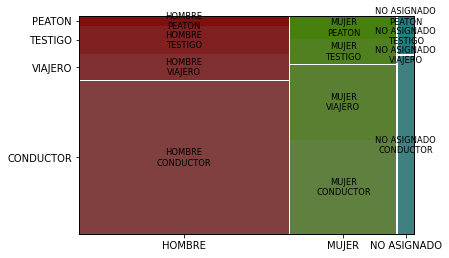

In [71]:
mosaic(data, ['SEXO', 'TIPO PERSONA'])
plt.show()

La mayoría de no asignados son conductores. Podríamos atribuirlo a hombre entonces estos no Asignados. Voy a probar con otras variables categóricas.

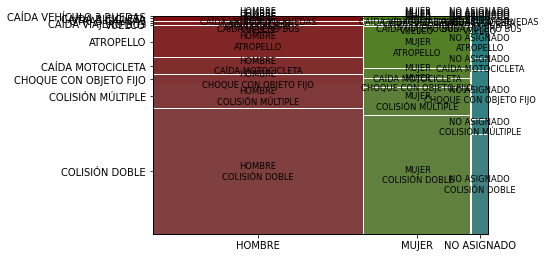

In [72]:
mosaic(data, ['SEXO', 'TIPO ACCIDENTE'])
plt.show()

Parece que lo más sencillo será imputar los no asignados a la categoría hombre.

In [73]:
data['SEXO'].replace({'NO ASIGNADO': 'HOMBRE'}, inplace=True)
data['SEXO'] = data['SEXO'].map({'HOMBRE':1,'MUJER':0})

In [74]:
data['SEXO'].value_counts()

1    172281
0     80717
Name: SEXO, dtype: int64

##### Tramo de Edad

In [75]:
data['Tramo Edad'].value_counts()

DE 30 A 34 ANOS      31110
DE 35 A 39 AÑOS      30169
DE 25 A 29 AÑOS      29797
DE 40 A 44 AÑOS      26421
DE 45 A 49 AÑOS      22167
DESCONOCIDA          19724
DE 21 A 24 AÑOS      19532
DE 50 A 54 AÑOS      17999
DE 55 A 59 AÑOS      12454
DE 18 A 20 AÑOS       9304
DE 60 A 64 AÑOS       8362
DE MAS DE 74 AÑOS     6361
DE 65 A 69 AÑOS       5097
DE 70 A 74 AÑOS       3656
DE 0 A 5 AÑOS         3128
DE 10 A 14 AÑOS       2804
DE 15 A 17 AÑOS       2593
DE 6 A 9 AÑOS         2320
Name: Tramo Edad, dtype: int64

En este caso tenemos muchas categorías así que creo que la mejor opción va a ser utilizar un método de imputación diferente. En este caso, hemos optado por rellenar reemplazar el valor DESCONOCIDA por NaN para luego pasarle una impitación aleatoria con todos los valores posibles del dataframe.

In [76]:
data['Tramo Edad'].replace({'DESCONOCIDA': np.nan}, inplace=True)

In [77]:
data['Tramo Edad'].isnull().sum()

19724

In [78]:
fill_list = data['Tramo Edad'].unique()
fill_list

array(['DE 18 A 20 AÑOS', 'DE 50 A 54 AÑOS', 'DE 40 A 44 AÑOS',
       'DE 25 A 29 AÑOS', 'DE 30 A 34 ANOS', 'DE 21 A 24 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 60 A 64 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 0 A 5 AÑOS', nan, 'DE 70 A 74 AÑOS', 'DE MAS DE 74 AÑOS',
       'DE 10 A 14 AÑOS', 'DE 6 A 9 AÑOS', 'DE 55 A 59 AÑOS',
       'DE 65 A 69 AÑOS', 'DE 15 A 17 AÑOS'], dtype=object)

In [79]:
fill_list = np.delete(fill_list, [10])

In [80]:
fill_list

array(['DE 18 A 20 AÑOS', 'DE 50 A 54 AÑOS', 'DE 40 A 44 AÑOS',
       'DE 25 A 29 AÑOS', 'DE 30 A 34 ANOS', 'DE 21 A 24 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 60 A 64 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 0 A 5 AÑOS', 'DE 70 A 74 AÑOS', 'DE MAS DE 74 AÑOS',
       'DE 10 A 14 AÑOS', 'DE 6 A 9 AÑOS', 'DE 55 A 59 AÑOS',
       'DE 65 A 69 AÑOS', 'DE 15 A 17 AÑOS'], dtype=object)

In [81]:
data['Tramo Edad'] = data['Tramo Edad'].fillna(pd.Series(np.random.choice(fill_list, size=len(data.index))))

In [82]:
data['Tramo Edad'].isnull().sum()

0

In [83]:
data.loc[data['Tramo Edad'] == 'DE 0 A 5 AÑOS','Tramo Edad'] = 'Menores de 18'
data.loc[data['Tramo Edad'] == 'DE 6 A 9 AÑOS','Tramo Edad'] = 'Menores de 18'
data.loc[data['Tramo Edad'] == 'DE 10 A 14 AÑOS','Tramo Edad'] = 'Menores de 18'
data.loc[data['Tramo Edad'] == 'DE 15 A 17 AÑOS','Tramo Edad'] = 'Menores de 18'
data.loc[data['Tramo Edad'] == 'DE 18 A 20 AÑOS','Tramo Edad'] = '18-29'
data.loc[data['Tramo Edad'] == 'DE 21 A 24 AÑOS','Tramo Edad'] = '18-29'
data.loc[data['Tramo Edad'] == 'DE 25 A 29 AÑOS','Tramo Edad'] = '18-29'
data.loc[data['Tramo Edad'] == 'DE 30 A 34 ANOS','Tramo Edad'] = '30-39'
data.loc[data['Tramo Edad'] == 'DE 35 A 39 AÑOS','Tramo Edad'] = '30-39'
data.loc[data['Tramo Edad'] == 'DE 40 A 44 AÑOS','Tramo Edad'] = '40-49'
data.loc[data['Tramo Edad'] == 'DE 45 A 49 AÑOS','Tramo Edad'] = '40-49'
data.loc[data['Tramo Edad'] == 'DE 50 A 54 AÑOS','Tramo Edad'] = '50-59'
data.loc[data['Tramo Edad'] == 'DE 55 A 59 AÑOS','Tramo Edad'] = '50-59'
data.loc[data['Tramo Edad'] == 'DE 60 A 64 AÑOS','Tramo Edad'] = '60-69'
data.loc[data['Tramo Edad'] == 'DE 65 A 69 AÑOS','Tramo Edad'] = '60-69'
data.loc[data['Tramo Edad'] == 'DE 70 A 74 AÑOS','Tramo Edad'] = 'Mayores de 70'
data.loc[data['Tramo Edad'] == 'DE MAS DE 74 AÑOS','Tramo Edad'] = 'Mayores de 70'


In [84]:
data['Tramo Edad'].value_counts()

30-39            63613
18-29            62213
40-49            50974
50-59            32771
60-69            15684
Menores de 18    15409
Mayores de 70    12334
Name: Tramo Edad, dtype: int64

In [85]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['Tramo Edad'])
data['Edad'] = data_prep.transform(data['Tramo Edad'])

In [86]:
data['Edad'].value_counts()

1    63613
0    62213
2    50974
3    32771
4    15684
6    15409
5    12334
Name: Edad, dtype: int64

##### Lesividad

La columna lesividad va a ser la variable a predecir en el modelo de clasificación que vamos a crear. Por ello, la transformamos en numérica para que funcione bien en el modelo.

In [87]:
data['LESIVIDAD'].value_counts()

IL             130053
HL             102716
NO ASIGNADA     11104
HG               8850
MT                275
Name: LESIVIDAD, dtype: int64

En este caso, como no quiero afectar mucho a los resultados, voy a eliminar todas las filas que tengan lesividad no asignada.

In [88]:
indexNames = data[data['LESIVIDAD'] == 'NO ASIGNADA'].index

In [89]:
data.drop(indexNames, inplace=True)

In [90]:
data['LESIVIDAD'].value_counts()

IL    130053
HL    102716
HG      8850
MT       275
Name: LESIVIDAD, dtype: int64

In [91]:
data.shape

(241894, 33)

In [92]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['LESIVIDAD'])
data['LESIVIDAD_y'] = data_prep.transform(data['LESIVIDAD'])

In [93]:
data['LESIVIDAD_y'].value_counts()

2    130053
1    102716
0      8850
3       275
Name: LESIVIDAD_y, dtype: int64

In [94]:
data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,MES,DIA,HORA,TIPO VIA,CATEGORIA VIA,T.ACCIDENTE,T_Vehiculo,T.PERSONA,Edad,LESIVIDAD_y
0,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,...,1,1,0,CALLE,5,6,11,0,0,2
1,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,...,1,1,0,CALLE,5,6,11,0,3,2
2,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,...,1,1,0,CALLE,5,6,11,3,2,1
3,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,0,0,0,...,1,1,0,AUTOVIA,2,7,9,3,0,1
4,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,0,0,0,...,1,1,0,AUTOVIA,2,7,9,3,1,1


#### Revisión últimos detalles

A continuación revisaré las últimas columnas que me quedan: día de la semana, distrito, número de víctimas y quitaré las que no me valen para el modelo como el número de parte y las que no voy a usar o ya he editado y creado una nueva columna.

##### Día Semana

In [95]:
data['DIA SEMANA'].value_counts()

VIERNES      41631
JUEVES       37232
MIERCOLES    37119
MARTES       36243
LUNES        34817
SABADO       29155
DOMINGO      25697
Name: DIA SEMANA, dtype: int64

In [96]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['DIA SEMANA'])
data['DIA_SEMANA'] = data_prep.transform(data['DIA SEMANA'])

In [97]:
data['DIA_SEMANA'].value_counts()

6    41631
1    37232
4    37119
3    36243
2    34817
5    29155
0    25697
Name: DIA_SEMANA, dtype: int64

##### Distrito

In [98]:
data['DISTRITO'].value_counts()

SALAMANCA              18665
CHAMARTIN              18040
CENTRO                 17204
CIUDAD LINEAL          15490
PUENTE DE VALLECAS     15313
CARABANCHEL            14616
CHAMBERI               13919
RETIRO                 13261
FUENCARRAL-EL PARDO    13236
MONCLOA-ARAVACA        13091
TETUAN                 12960
ARGANZUELA             12629
LATINA                 11552
SAN BLAS               11470
USERA                   8381
HORTALEZA               8090
VILLAVERDE              6344
MORATALAZ               5993
VILLA DE VALLECAS       5371
BARAJAS                 3249
VICALVARO               3020
Name: DISTRITO, dtype: int64

In [99]:
data_prep = LabelEncoder()
data_prep.fit_transform(data['DISTRITO'])
data['DISTRITO_num'] = data_prep.transform(data['DISTRITO'])

In [100]:
data['DISTRITO'].value_counts()

SALAMANCA              18665
CHAMARTIN              18040
CENTRO                 17204
CIUDAD LINEAL          15490
PUENTE DE VALLECAS     15313
CARABANCHEL            14616
CHAMBERI               13919
RETIRO                 13261
FUENCARRAL-EL PARDO    13236
MONCLOA-ARAVACA        13091
TETUAN                 12960
ARGANZUELA             12629
LATINA                 11552
SAN BLAS               11470
USERA                   8381
HORTALEZA               8090
VILLAVERDE              6344
MORATALAZ               5993
VILLA DE VALLECAS       5371
BARAJAS                 3249
VICALVARO               3020
Name: DISTRITO, dtype: int64

##### Número de víctimas

In [101]:
data['* Nº VICTIMAS'].isnull().sum()

0

#### DATASET PARA MODELO PRE MUESTREO

In [102]:
data.dtypes

FECHA                datetime64[ns]
RANGO HORARIO                object
DIA SEMANA                   object
DISTRITO                     object
LUGAR ACCIDENTE              object
Nº                           object
Nº PARTE                     object
CPFA Granizo                  int64
CPFA Hielo                    int64
CPFA Lluvia                   int64
CPFA Niebla                   int64
CPFA Seco                     int64
CPFA Nieve                    int64
CPSV Aceite                   int64
CPSV Barro                    int64
CPSV Grava Suelta             int64
* Nº VICTIMAS                 int64
TIPO ACCIDENTE               object
Tipo_Vehiculo                object
TIPO PERSONA                 object
SEXO                          int64
LESIVIDAD                    object
Tramo Edad                   object
AÑO                           int64
MES                           int64
DIA                           int64
HORA                          int64
TIPO VIA                    

Ahora que ya tenemos listos los datos, realizamos una partición del dataset en train y test de forma estratificada.

### Train-Test Split

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
y = data.filter(['LESIVIDAD_y'], axis=1)

In [105]:
y.head()

,LESIVIDAD_y
0,2
1,2
2,1
3,1
4,1


In [106]:
X = data.copy()

In [107]:
X.drop(['FECHA','DISTRITO', 'RANGO HORARIO', 'LUGAR ACCIDENTE','Nº','Nº PARTE','TIPO ACCIDENTE','DIA SEMANA','TIPO PERSONA','Tramo Edad','TIPO VIA','Tipo_Vehiculo',], axis='columns', inplace=True)

In [108]:
X.drop(['LESIVIDAD','LESIVIDAD_y',], axis='columns', inplace=True)

In [109]:
pd.options.display.max_columns = None
display(X)

,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,* Nº VICTIMAS,SEXO,AÑO,MES,DIA,HORA,CATEGORIA VIA,T.ACCIDENTE,T_Vehiculo,T.PERSONA,Edad,DIA_SEMANA,DISTRITO_num
0,0,0,1,0,0,0,0,0,0,1,1,2010,1,1,0,5,6,11,0,0,6,4
1,0,0,1,0,0,0,0,0,0,1,1,2010,1,1,0,5,6,11,0,3,6,4
2,0,0,1,0,0,0,0,0,0,1,0,2010,1,1,0,5,6,11,3,2,6,4
3,0,0,0,0,1,0,0,0,0,7,0,2010,1,1,0,2,7,9,3,0,6,12
4,0,0,0,0,1,0,0,0,0,7,0,2010,1,1,0,2,7,9,3,1,6,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252992,0,0,0,0,1,0,0,0,0,1,0,2018,12,31,2,5,6,11,3,0,2,14
252993,0,0,0,0,1,0,0,0,0,1,1,2018,12,31,2,5,6,11,3,1,2,14
252994,0,0,0,0,1,0,0,0,0,1,1,2018,12,31,2,5,6,1,0,2,2,14
252995,0,0,0,0,1,0,0,0,0,1,0,2018,12,31,2,5,8,11,0,0,2,8


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)

In [111]:
len(X_train)

193515

In [112]:
len(y_train)

193515

In [113]:
len(X_test)

48379

In [114]:
len(y_test)

48379

### MODELO 1: ÁRBOL DE DECISIÓN

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
decisiontree = DecisionTreeClassifier(max_depth = 4, random_state=0)

A continuación, creamos el modelo y lo entrenamos con los datos de train.

In [117]:
model = decisiontree.fit(X_train, y_train)

##### Visualización del árbol

In [118]:
import pydotplus
from IPython.display import Image
from sklearn import tree

In [119]:
class_names = decisiontree.classes_
feature_names = list(X_train.columns)

In [120]:
class_names

array([0, 1, 2, 3])

In [121]:
class_names = ['HG','HL','IL','MT']

In [122]:
dot_data = tree.export_graphviz(decisiontree, out_file=None,feature_names=feature_names, class_names=class_names)

In [123]:
graph = pydotplus.graph_from_dot_data(dot_data)

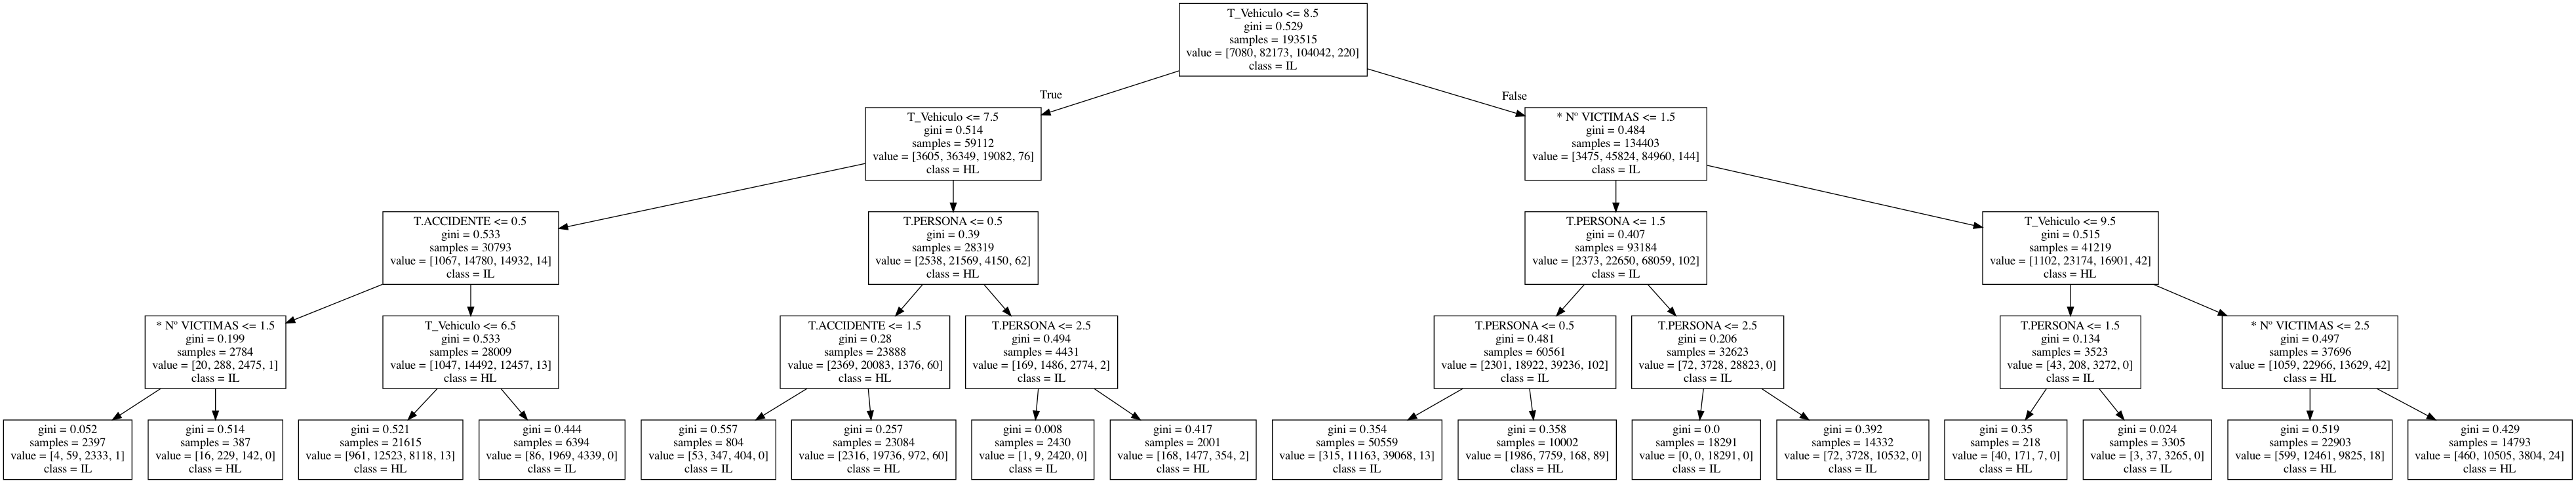

In [124]:
Image(graph.create_png())

##### Evaluación del modelo

Ahora, predecimos la lesividad de las víctimas de accidentes que tenemos en le dataset de test y comprobamos cómo de accurate es el modelo.

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

Primero creamos una matriz de confusión para ver cómo ha clasificado el modelo cada sample de dato en una de las posibles clases.

In [126]:
y_pred = model.predict(X_test)

In [127]:
matrix = confusion_matrix(y_test, y_pred)

In [128]:
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

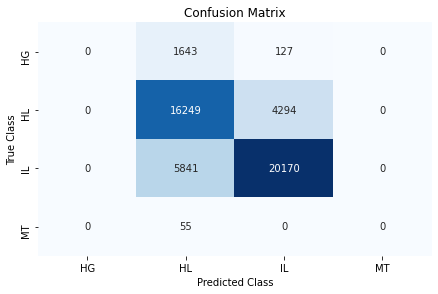

In [129]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

Parece que el modelo no tiene mucha precisión. Para los Heridos Leves (HL) y los ilesos (IL) ha acertado el 78% de los casos mientras que para Heridos graves (HG) y muertes (MT) no ha acertado ni uno. Por ello, voy a ver si con validación cruzada repetida obtenemos una evaluación diferente del modelo.

In [130]:
cross_val_score(decisiontree, X, y, scoring='accuracy')

array([0.74813452, 0.75412886, 0.75600984, 0.75768412, 0.76104841])

Antes de aplicar cambios en las features o hacer una preselección de features voy a probar a variar la profundidad del árbol, para ver cómo varía el accuracy del modelo y su capacidad de predicción.

In [131]:
decisiontree2 = DecisionTreeClassifier(max_depth = 10, random_state=0)

In [132]:
model2 = decisiontree2.fit(X_train, y_train)

In [133]:
y_pred = model2.predict(X_test)

In [134]:
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

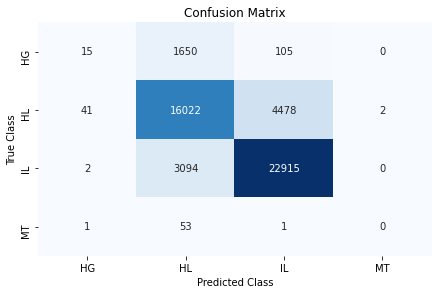

In [135]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

En este caso vemos que el modelo mejora pero muy poco. Las muertes siguen teniendo un acierto del 0% y los heridos leves mantienen su accuracy del 78% pero los heridos graves aumentan a 1.4% y los ilesos a 88%.

In [136]:
cross_val_score(decisiontree2, X, y, scoring='accuracy')

array([0.79054962, 0.79873499, 0.80233159, 0.80904938, 0.78918103])

Efectivamente, un poco mejor que antes.

In [137]:
decisiontree3 = DecisionTreeClassifier(random_state=0)
model3 = decisiontree3.fit(X_train, y_train)

In [138]:
y_pred = model3.predict(X_test)

In [139]:
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

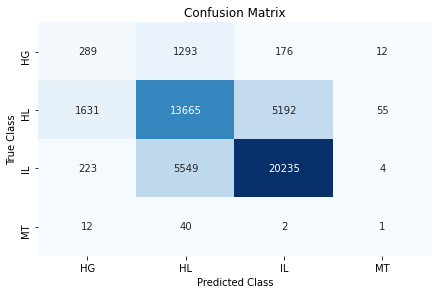

In [140]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

In [141]:
cross_val_score(decisiontree3, X, y, scoring='accuracy')

array([0.6312863 , 0.67120031, 0.68240352, 0.69705864, 0.69087188])

En este caso vemos que el accuracy de HG y MT aumenta mientras que HL e IL disminuye. En general, con la validación cruzada salen resultados bastante regulares por lo que antes de continuar vamos a probar algo de feature engineering y feature selection para mejorar el modelo. 

Además, por los resultados que vemos en la matroz de confusión, parece que estamos teniendo problemas por el desbalance de clases:
- IL: 53%
- HL: 42%
- HG: 3.6%
- MT: 0.1%

Por ello, vamos a tener que balancear primero las clases y despues seguir probando cosas.

### BALANCEO DE CLASES A PREDECIR

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
X_train_oversampled = X_train.values

In [144]:
X_train_oversampled

array([[ 0,  0,  0, ...,  0,  3,  9],
       [ 0,  0,  1, ...,  1,  1, 14],
       [ 0,  0,  0, ...,  4,  1, 14],
       ...,
       [ 0,  0,  0, ...,  2,  1,  4],
       [ 0,  0,  0, ...,  0,  3, 13],
       [ 0,  0,  0, ...,  0,  2, 11]])

In [145]:
y_train_oversampled = y_train.values

In [146]:
y_train_oversampled

array([[1],
       [1],
       [2],
       ...,
       [2],
       [1],
       [2]])

In [147]:
oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oversampled, y_train_oversampled)

Class=1, n=104042 (25.000%)
Class=2, n=104042 (25.000%)
Class=0, n=104042 (25.000%)
Class=3, n=104042 (25.000%)


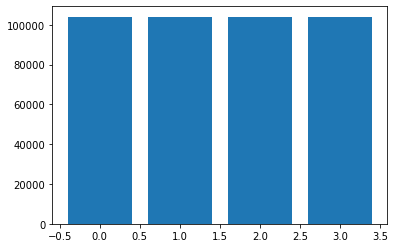

In [148]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [149]:
X_train = pd.DataFrame(X, columns=X_train.columns)

In [150]:
y_train = pd.DataFrame(y, columns=y_train.columns)

### MODELO 2: Árbol de decisión con balanceo de clases

In [151]:
decisiontree = DecisionTreeClassifier(max_depth = 4, random_state=0)

In [152]:
model = decisiontree.fit(X_train, y_train)

In [153]:
y_pred = model.predict(X_test)

In [154]:
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

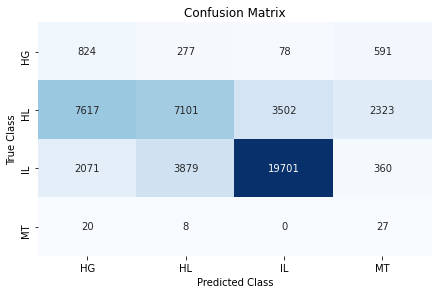

In [155]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

Ahora hemos mejorado bastante los aciertos para MT y HG aunque a costa de bajar el acierto en IL y sobre todo el HL que queda en nada prácticamente: una tasa de acierto del 3.45%.

In [156]:
cross_val_score(decisiontree, X, y, scoring='accuracy')

array([0.55366797, 0.55498955, 0.55530192, 0.56034265, 0.5426093 ])

La tasa de acierto queda bastante en evidencia en este caso.

### SEGUIMOS PROBANDO OTRAS COSAS

Uno de los problemas que nos encontramos al interpretar el árbol de decisión es que está tomando las variables nominales (como tipo de vehículo) como si fueran ordinales y tuvieran orden. Es decir, según los modelos creados hasta ahora, el primer criterio de decisión es si el tipo de vehículo es mayor o menor de 8,5. Esto, realmente no tiene mucho sentido ya que los vehículos cuyo mapeo tiene un número menor de 8 puede que no tengan nada en común. No significa nada decir que un vehículo es mayor o menor que 8. 

Por lo tanto, el siguiente paso que vamos a hacer es buscar las variables con más correlación con la target y utilizar OneHotEncoding para el siguiente modelo. Con ello, pretendemos que el árbol entienda mejor las variables y seleccionando solo aquellas más correlacionadas evitamos tener demasiadas features que no aportan mucho.

### FEATURE SELECTION

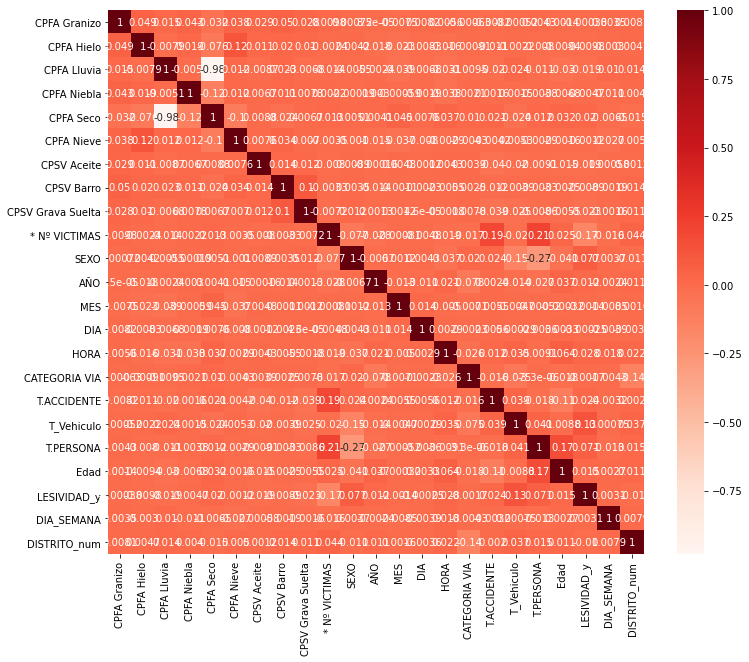

In [157]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Así a priori parece que las únicas variables que están muy correlacionadas son CPFA Seco y CPFA Lluvia.

In [158]:
#Voy a ver qué variables son las que tienen más correlación con la target.
cor_target = abs(cor["LESIVIDAD_y"])
relevant_features = cor_target[cor_target>0.025]
relevant_features

* Nº VICTIMAS    0.167051
SEXO             0.077169
HORA             0.027874
T_Vehiculo       0.128018
T.PERSONA        0.070774
LESIVIDAD_y      1.000000
Name: LESIVIDAD_y, dtype: float64

Realmente ninguna tiene mucha correlación con lesividad pero bueno, estas serían las más correlacionadas.

### FEATURE ENGINEERING 1

In [159]:
#Empezamos de nuevo con el dataframe data que contiene todas las variables transformadas originalmente
data.head()

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,CPFA Niebla,CPFA Seco,CPFA Nieve,CPSV Aceite,CPSV Barro,CPSV Grava Suelta,* Nº VICTIMAS,TIPO ACCIDENTE,Tipo_Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad,AÑO,MES,DIA,HORA,TIPO VIA,CATEGORIA VIA,T.ACCIDENTE,T_Vehiculo,T.PERSONA,Edad,LESIVIDAD_y,DIA_SEMANA,DISTRITO_num
0,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,0,0,0,0,0,0,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,1,IL,18-29,2010,1,1,0,CALLE,5,6,11,0,0,2,6,4
1,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,0,0,0,0,0,0,1,COLISIÓN DOBLE,TURISMO,CONDUCTOR,1,IL,50-59,2010,1,1,0,CALLE,5,6,11,0,3,2,6,4
2,2010-01-01,Madrugada,VIERNES,CHAMARTIN,CALLE DE CARTAGENA NUM,104,2010/135,0,0,1,0,0,0,0,0,0,1,COLISIÓN DOBLE,TURISMO,VIAJERO,0,HL,40-49,2010,1,1,0,CALLE,5,6,11,3,2,1,6,4
3,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,0,0,0,0,1,0,0,0,0,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,0,HL,18-29,2010,1,1,0,AUTOVIA,2,7,9,3,0,1,6,12
4,2010-01-01,Madrugada,VIERNES,PUENTE DE VALLECAS,AUTOVIA M-30 CALZADA 2 KM.,10200,2010/94,0,0,0,0,1,0,0,0,0,7,COLISIÓN MÚLTIPLE,NO ASIGNADO,VIAJERO,0,HL,30-39,2010,1,1,0,AUTOVIA,2,7,9,3,1,1,6,12


Lo primero que haremos va a ser transformar a dummies las variables Tipo Vehículo y Tipo persona ya que son nominales. Hora hay que cambiar alguna cosa porque aunque es numérica y ordinal, no tiene el orden necesario (ha ordenado por orden alfabético cuando el orden real sería Madrugada-Mañana-Tarde-Noche). Tenemos que cambiar Tarde por Noche.

In [160]:
data['HORA'].value_counts()

3    106360
1     72001
2     47032
0     16501
Name: HORA, dtype: int64

In [161]:
data['RANGO HORARIO'].value_counts()

Tarde        106360
Mañana        72001
Noche         47032
Madrugada     16501
Name: RANGO HORARIO, dtype: int64

In [162]:
data['HORA'] = data['HORA'].map({0:0,1:1,2:3,3:2})

In [163]:
data['HORA'].value_counts()

2    106360
1     72001
3     47032
0     16501
Name: HORA, dtype: int64

A continuación, voy a aplicar dummies a las variables tipo de persona y tipo de vehículo

##### Tipo de vehículo

In [350]:
dum_df = pd.get_dummies(data, columns=["Tipo_Vehiculo"], prefix=["Type_is"] )

In [351]:
dum_df_2 = pd.get_dummies(dum_df, columns=["TIPO PERSONA"], prefix=["Type_is"] )

In [166]:
dum_df_2.dtypes

FECHA                       datetime64[ns]
RANGO HORARIO                       object
DIA SEMANA                          object
DISTRITO                            object
LUGAR ACCIDENTE                     object
Nº                                  object
Nº PARTE                            object
CPFA Granizo                         int64
CPFA Hielo                           int64
CPFA Lluvia                          int64
CPFA Niebla                          int64
CPFA Seco                            int64
CPFA Nieve                           int64
CPSV Aceite                          int64
CPSV Barro                           int64
CPSV Grava Suelta                    int64
* Nº VICTIMAS                        int64
TIPO ACCIDENTE                      object
SEXO                                 int64
LESIVIDAD                           object
Tramo Edad                          object
AÑO                                  int64
MES                                  int64
DIA        

### MODELO 3: ÁRBOL DE DECISIÓN CON FEATURE SELECTION, VARIABLES DUMMY Y BALANCEO DE CLASES

In [167]:
X = dum_df_2.copy()

In [168]:
X.dtypes

FECHA                       datetime64[ns]
RANGO HORARIO                       object
DIA SEMANA                          object
DISTRITO                            object
LUGAR ACCIDENTE                     object
Nº                                  object
Nº PARTE                            object
CPFA Granizo                         int64
CPFA Hielo                           int64
CPFA Lluvia                          int64
CPFA Niebla                          int64
CPFA Seco                            int64
CPFA Nieve                           int64
CPSV Aceite                          int64
CPSV Barro                           int64
CPSV Grava Suelta                    int64
* Nº VICTIMAS                        int64
TIPO ACCIDENTE                      object
SEXO                                 int64
LESIVIDAD                           object
Tramo Edad                          object
AÑO                                  int64
MES                                  int64
DIA        

In [169]:
X.drop(['FECHA', 'RANGO HORARIO','DISTRITO','DIA SEMANA','DIA_SEMANA','DISTRITO_num','T.PERSONA', 'LUGAR ACCIDENTE','Nº','Nº PARTE','TIPO ACCIDENTE','* Nº VICTIMAS','CPFA Granizo','CPFA Hielo','CPFA Lluvia','CPFA Niebla','CPFA Seco','CPFA Nieve','CPSV Aceite','CPSV Barro','CPSV Grava Suelta','LESIVIDAD','Tramo Edad','AÑO','MES','DIA','TIPO VIA','CATEGORIA VIA','T.ACCIDENTE','T_Vehiculo','Edad','LESIVIDAD_y',], axis='columns', inplace=True)

In [170]:
X.dtypes

SEXO                        int64
HORA                        int64
Type_is_AMBULANCIA          uint8
Type_is_AUTO-TAXI           uint8
Type_is_AUTOBUS-AUTOCAR     uint8
Type_is_BICICLETA           uint8
Type_is_BUS COMO VIAJERO    uint8
Type_is_CAMION              uint8
Type_is_CICLOMOTOR          uint8
Type_is_FURGONETA           uint8
Type_is_MOTOCICLETA         uint8
Type_is_NO ASIGNADO         uint8
Type_is_SIN VEHICULO        uint8
Type_is_TURISMO             uint8
Type_is_VARIOS              uint8
Type_is_VEH.3 RUEDAS        uint8
Type_is_CONDUCTOR           uint8
Type_is_PEATON              uint8
Type_is_TESTIGO             uint8
Type_is_VIAJERO             uint8
dtype: object

Aquí nos quedamos con el dataframe X con las variables tipo de persona, tipo de vehículo, sexo y hora.

In [171]:
y = dum_df_2.filter(['LESIVIDAD_y'], axis=1)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)

##### Balanceo del nuevo dataset para el modelo

Class=1, n=104042 (25.000%)
Class=2, n=104042 (25.000%)
Class=0, n=104042 (25.000%)
Class=3, n=104042 (25.000%)


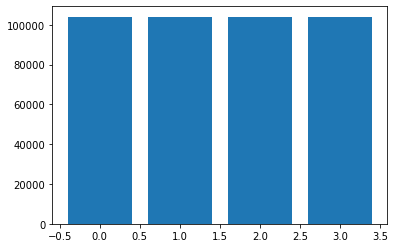

In [173]:
X_train_oversampled = X_train.values
y_train_oversampled = y_train.values

oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oversampled, y_train_oversampled)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [174]:
X_train = pd.DataFrame(X, columns=X_train.columns)
y_train = pd.DataFrame(y, columns=y_train.columns)

In [175]:
type(X_train)

pandas.core.frame.DataFrame

In [176]:
type(y_train)

pandas.core.frame.DataFrame

#### Comenzamos con este nuevo modelo

In [177]:
decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train, y_train)

In [178]:
feature_names = list(X_train.columns)
dot_data = tree.export_graphviz(decisiontree, out_file=None,feature_names=feature_names, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Visualmente no es muy interpretable. Ahora vemos cómo es su rendimiento.

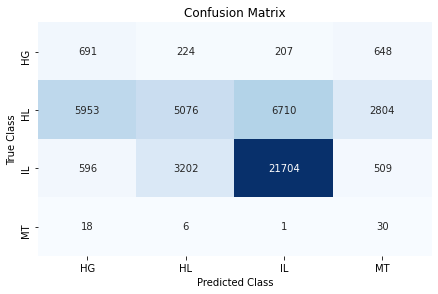

In [179]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

In [180]:
cross_val_score(decisiontree, X, y, scoring='accuracy')

array([0.55058029, 0.54879016, 0.54829757, 0.54981798, 0.55163217])

El modelo sigue sin rendir bien. Una de las razones por las cuales esto puede pasar se explica en este artículo que propone comparar el rendimiento de los árboles de decisión usando variables categóricas nominales con muchas categorías frente a una regresión logística e incluso un árbol de decisión con H20. 

https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/

Por ello, lo siguiente que voy a intentar va a ser hacer un modelo de regresión logística con las mismas variables utilizadas para el modelo de árbol anterior.

### MODELO 4: Regresión logística

##### Comenzamos con el modelo

In [181]:
from sklearn.linear_model.logistic import LogisticRegression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [182]:
classifier = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train.values.ravel())
y_pred = classifier.predict(X_test)

##### Evaluación del rendimiento del modelo

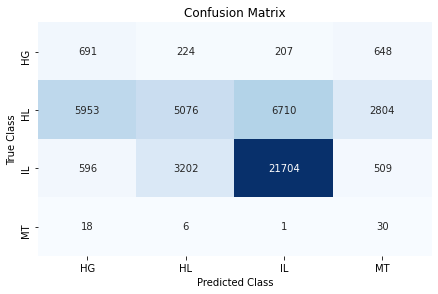

In [183]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

El rendimiento de este modelo es muy parecido al rendimiento del modelo anterior (árbol con balanceo de clases). Parece que no mejora. Lo siguiente que vamos a probar va a ser simplificar el modelo para hacer un clasificador binario: grave o leve.

### MODELO 5: SIMPLIFICACIÓN DEL MODELO: mapeo graves y leves

In [352]:
dum_df_2['LESIVIDAD_y'].value_counts()

2    130053
1    102716
0      8850
3       275
Name: LESIVIDAD_y, dtype: int64

In [353]:
dum_df_2['LESIVIDAD'].value_counts()

IL    130053
HL    102716
HG      8850
MT       275
Name: LESIVIDAD, dtype: int64

In [354]:
dum_df_2['LESIVIDAD'] = dum_df_2['LESIVIDAD'].map({'IL':'Leve','HL':'Leve','HG':'Grave','MT':'Grave'})

In [355]:
dum_df_2['LESIVIDAD'].value_counts()

Leve     232769
Grave      9125
Name: LESIVIDAD, dtype: int64

In [356]:
dum_df_2['LESIVIDAD_y'] = dum_df_2['LESIVIDAD'].map({'Leve':0,'Grave':1})

In [357]:
dum_df_2['LESIVIDAD_y'].value_counts()

0    232769
1      9125
Name: LESIVIDAD_y, dtype: int64

##### A continuación: volvemos a crear los dataframes X e y y balanceamos las clases en el train.

In [358]:
X = dum_df_2.copy()

In [359]:
X.drop(['FECHA', 'RANGO HORARIO','DISTRITO','DIA SEMANA','DIA_SEMANA','DISTRITO_num','T.PERSONA', 'LUGAR ACCIDENTE','Nº','Nº PARTE','TIPO ACCIDENTE','* Nº VICTIMAS','CPFA Granizo','CPFA Hielo','CPFA Lluvia','CPFA Niebla','CPFA Seco','CPFA Nieve','CPSV Aceite','CPSV Barro','CPSV Grava Suelta','LESIVIDAD','Tramo Edad','AÑO','MES','DIA','TIPO VIA','CATEGORIA VIA','T.ACCIDENTE','T_Vehiculo','Edad','LESIVIDAD_y',], axis='columns', inplace=True)

In [360]:
y = dum_df_2.filter(['LESIVIDAD_y'], axis=1)

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)

Class=0, n=186215 (50.000%)
Class=1, n=186215 (50.000%)


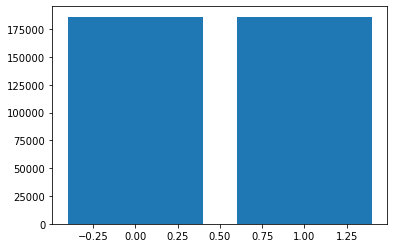

In [362]:
X_train_oversampled = X_train.values
y_train_oversampled = y_train.values

oversample = SMOTE()
X, y = oversample.fit_resample(X_train_oversampled, y_train_oversampled)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [363]:
X_train = pd.DataFrame(X, columns=X_train.columns)
y_train = pd.DataFrame(y, columns=y_train.columns)

#### REGRESIÓN LOGÍSTICA 2 CLASES

In [414]:
logi_2 = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train.values.ravel())

##### Evaluación rendimiento modelo

In [365]:
y_pred = pd.Series(logi_2.predict(X_test), index=X_test.index)

In [366]:
matrix = confusion_matrix(y_test, y_pred)

In [367]:
matrix

array([[36323, 10231],
       [  363,  1462]])

In [368]:
dataframe = pd.DataFrame(matrix, index=logi_2.classes_, columns=logi_2.classes_)

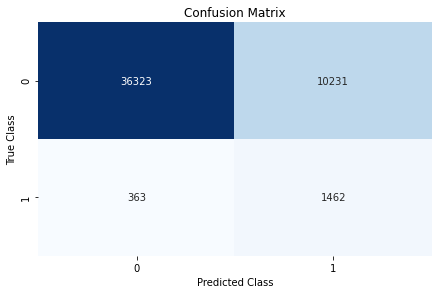

In [369]:
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

Esto ya pinta mucho mejor. Al agrupar entre graves y leves, hemos conseguido aumentar la tasa de aciertos. El balanceo de clases también ayuda a clasificar mejor la clase minoritaria. De hecho, ahora mismo estamos teniendo una tasa de acierto del 81% (esto sería, la sensibilidad, la capacidad de detectar las víctimas realmente graves) y una tasa del 77% (esto sería la especificidad) para los leves. 

Al fin y al cabo, nuestro objetivo creando este modelo consiste en optimizar los recursos médicos y policiales en el ámbito de accidentes y contribuir a una mayor probabilidad de sobrevivir respondiendo lo antes posible a los accidnetes graves. Por ello, el haber conseguido reducir la tasa de falsos leves (que realmente eran graves) es lo más importante.

### Selección de punto de corte para reducir la tasa de falsos negativos (leves que realmente son graves)

In [405]:
y_pred_prob_1 = logi_2.predict_proba(X_test)[:, 1]

In [406]:
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frecuencia')

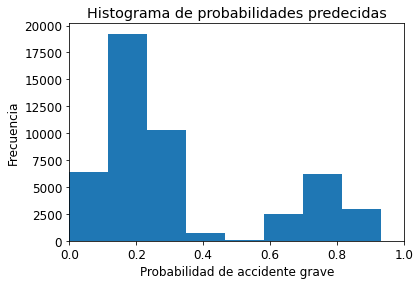

In [409]:
plt.hist(y_pred_prob_1, bins=8)
plt.xlim(0,1)
plt.title('Histograma de probabilidades predecidas')
plt.xlabel('Probabilidad de accidente grave')
plt.ylabel('Frecuencia')

In [419]:
#Cambiamos threshold de predicción a 0,2
y_pred = (logi_2.predict_proba(X_test)[:,1] >= 0.3).astype(bool) 

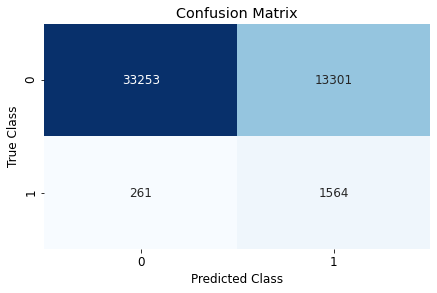

In [420]:
matrix = confusion_matrix(y_test, y_pred)

dataframe = pd.DataFrame(matrix, index=logi_2.classes_, columns=logi_2.classes_)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g') 
plt.title("Confusion Matrix"), plt.tight_layout() 
plt.ylabel("True Class"), plt.xlabel("Predicted Class") 
plt.show()

Hemos mejorado la sensibilidad del modelo de esta forma.

### EXPORTAR INFORMACIÓN DEL MODELO

In [423]:
y_pred = pd.Series((logi_2.predict_proba(X_test)[:,1] >= 0.3).astype(bool), index=X_test.index)

In [424]:
y_pred = y_pred.to_frame()

In [426]:
y_pred.columns = ['Pred']

In [427]:
datos_modelo = X_test.join(y_pred)

In [428]:
datos_modelo.head()

,SEXO,HORA,Type_is_AMBULANCIA,Type_is_AUTO-TAXI,Type_is_AUTOBUS-AUTOCAR,Type_is_BICICLETA,Type_is_BUS COMO VIAJERO,Type_is_CAMION,Type_is_CICLOMOTOR,Type_is_FURGONETA,Type_is_MOTOCICLETA,Type_is_NO ASIGNADO,Type_is_SIN VEHICULO,Type_is_TURISMO,Type_is_VARIOS,Type_is_VEH.3 RUEDAS,Type_is_CONDUCTOR,Type_is_PEATON,Type_is_TESTIGO,Type_is_VIAJERO,Pred
128480,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False
180981,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,True
70460,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,True
60907,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,False
15913,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,False


In [429]:
dum_vehiculo = datos_modelo.drop(['SEXO', 'HORA','Type_is_CONDUCTOR', 'Type_is_PEATON','Type_is_TESTIGO','Type_is_VIAJERO','Pred',], axis=1)

In [430]:
dum_vehiculo.head()

,Type_is_AMBULANCIA,Type_is_AUTO-TAXI,Type_is_AUTOBUS-AUTOCAR,Type_is_BICICLETA,Type_is_BUS COMO VIAJERO,Type_is_CAMION,Type_is_CICLOMOTOR,Type_is_FURGONETA,Type_is_MOTOCICLETA,Type_is_NO ASIGNADO,Type_is_SIN VEHICULO,Type_is_TURISMO,Type_is_VARIOS,Type_is_VEH.3 RUEDAS
128480,0,0,0,0,0,0,0,0,0,0,0,1,0,0
180981,0,0,0,0,0,0,0,0,1,0,0,0,0,0
70460,0,0,0,0,0,0,0,0,0,0,0,1,0,0
60907,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15913,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [431]:
vehiculos = dum_vehiculo.idxmax(axis=1)

In [432]:
dum_personas = datos_modelo.drop(['SEXO', 'HORA','Type_is_AMBULANCIA', 'Type_is_AUTO-TAXI','Type_is_AUTOBUS-AUTOCAR','Type_is_BICICLETA','Type_is_BUS COMO VIAJERO','Type_is_CAMION','Type_is_CICLOMOTOR','Type_is_FURGONETA','Type_is_MOTOCICLETA','Type_is_NO ASIGNADO','Type_is_SIN VEHICULO','Type_is_TURISMO','Type_is_VARIOS','Type_is_VEH.3 RUEDAS','Pred',], axis=1)

In [433]:
dum_personas.head()

,Type_is_CONDUCTOR,Type_is_PEATON,Type_is_TESTIGO,Type_is_VIAJERO
128480,0,0,0,1
180981,1,0,0,0
70460,1,0,0,0
60907,0,0,0,1
15913,0,0,1,0


In [434]:
personas = dum_personas.idxmax(axis=1)

In [435]:
personas = personas.to_frame()
vehiculos = vehiculos.to_frame()

In [436]:
datos_modelo = datos_modelo.filter(['SEXO','HORA','Pred',], axis=1)

In [437]:
datos_modelo.head()

,SEXO,HORA,Pred
128480,0,2,False
180981,1,1,True
70460,1,0,True
60907,0,2,False
15913,1,1,False


In [438]:
datos_modelo['SEXO'] = datos_modelo['SEXO'].map({1:'Hombre',0:'Mujer'})
datos_modelo['Pred'] = datos_modelo['Pred'].map({False:'Leve',True:'Grave'})
datos_modelo['HORA'] = datos_modelo['HORA'].map({0:'Madrugada',1:'Mañana',2:'Tarde',3:'Noche'})

In [439]:
datos_modelo.head()

,SEXO,HORA,Pred
128480,Mujer,Tarde,Leve
180981,Hombre,Mañana,Grave
70460,Hombre,Madrugada,Grave
60907,Mujer,Tarde,Leve
15913,Hombre,Mañana,Leve


In [440]:
datos_modelo = datos_modelo.join(vehiculos)

In [441]:
datos_modelo.head()

,SEXO,HORA,Pred,0
128480,Mujer,Tarde,Leve,Type_is_TURISMO
180981,Hombre,Mañana,Grave,Type_is_MOTOCICLETA
70460,Hombre,Madrugada,Grave,Type_is_TURISMO
60907,Mujer,Tarde,Leve,Type_is_TURISMO
15913,Hombre,Mañana,Leve,Type_is_NO ASIGNADO


In [442]:
datos_modelo.columns = ['Sexo', 'Hora','Lesividad','Vehiculo']

In [443]:
datos_modelo = datos_modelo.join(personas)

In [444]:
datos_modelo.columns = ['Sexo', 'Hora','Lesividad','Vehiculo', 'Tipo_persona']

In [445]:
datos_modelo.head()

,Sexo,Hora,Lesividad,Vehiculo,Tipo_persona
128480,Mujer,Tarde,Leve,Type_is_TURISMO,Type_is_VIAJERO
180981,Hombre,Mañana,Grave,Type_is_MOTOCICLETA,Type_is_CONDUCTOR
70460,Hombre,Madrugada,Grave,Type_is_TURISMO,Type_is_CONDUCTOR
60907,Mujer,Tarde,Leve,Type_is_TURISMO,Type_is_VIAJERO
15913,Hombre,Mañana,Leve,Type_is_NO ASIGNADO,Type_is_TESTIGO


In [446]:
datos_modelo['Vehiculo'] = datos_modelo['Vehiculo'].str.replace('Type_is_', '')
datos_modelo['Tipo_persona'] = datos_modelo['Tipo_persona'].str.replace('Type_is_', '')

In [447]:
datos_modelo

,Sexo,Hora,Lesividad,Vehiculo,Tipo_persona
128480,Mujer,Tarde,Leve,TURISMO,VIAJERO
180981,Hombre,Mañana,Grave,MOTOCICLETA,CONDUCTOR
70460,Hombre,Madrugada,Grave,TURISMO,CONDUCTOR
60907,Mujer,Tarde,Leve,TURISMO,VIAJERO
15913,Hombre,Mañana,Leve,NO ASIGNADO,TESTIGO
...,...,...,...,...,...
51927,Hombre,Mañana,Leve,TURISMO,CONDUCTOR
91843,Hombre,Madrugada,Grave,TURISMO,VIAJERO
247807,Mujer,Mañana,Grave,SIN VEHICULO,PEATON
206395,Hombre,Mañana,Leve,MOTOCICLETA,TESTIGO


In [448]:
datos_modelo['Tipo_persona'] = datos_modelo['Tipo_persona'].str.title()
datos_modelo['Vehiculo'] = datos_modelo['Vehiculo'].str.title()

In [449]:
datos_modelo.head()

,Sexo,Hora,Lesividad,Vehiculo,Tipo_persona
128480,Mujer,Tarde,Leve,Turismo,Viajero
180981,Hombre,Mañana,Grave,Motocicleta,Conductor
70460,Hombre,Madrugada,Grave,Turismo,Conductor
60907,Mujer,Tarde,Leve,Turismo,Viajero
15913,Hombre,Mañana,Leve,No Asignado,Testigo


In [451]:
#### INSERTAR ESTO AL MODELO

In [452]:
probabilidades = pd.DataFrame(logi_2.predict_proba(X_test), index=X_test.index)

In [454]:
datos_modelo = datos_modelo.join(probabilidades)

In [456]:
datos_modelo.head()

,Sexo,Hora,Lesividad,Vehiculo,Tipo_persona,0,1
128480,Mujer,Tarde,Leve,Turismo,Viajero,0.776015,0.223985
180981,Hombre,Mañana,Grave,Motocicleta,Conductor,0.223961,0.776039
70460,Hombre,Madrugada,Grave,Turismo,Conductor,0.699376,0.300624
60907,Mujer,Tarde,Leve,Turismo,Viajero,0.776015,0.223985
15913,Hombre,Mañana,Leve,No Asignado,Testigo,0.999676,0.000324


In [457]:
datos_modelo.columns = ['Sexo', 'Hora','Lesividad','Vehiculo', 'Tipo_persona', 'Prob_leve','Prob_grave']

In [458]:
datos_modelo.to_excel("datos_modelo.xlsx")  